In [105]:
#!usr/bin/python3 

import pandas as pd
import json
import matplotlib.pyplot as plt
from iso639 import languages
from textblob import TextBlob
import re
from wordcloud import WordCloud, STOPWORDS

In [28]:
tweets_data_path = 'New-tweet_extract.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

print ("Total Data Samples Present -", len(tweets_data))

Total Data Samples Present - 10000


In [29]:
tweets = pd.DataFrame(tweets_data, columns=["text","lang","country", "user"])
tweets.head()

,text,lang,country,user
0,"RT @FrustIndian: Day 1: I will take Modi down,...",en,NaN,"{'screen_name': 'youknowwhat012', 'profile_bac..."
1,"RT @Pawankhera: For the people of India, every...",en,NaN,"{'screen_name': 'amsabri7', 'profile_backgroun..."
2,RT @alok_bhatt: What will Modi do in this chao...,en,NaN,"{'screen_name': 'AutoVega', 'profile_backgroun..."
3,RT @j_kalyanaraman: All these crooks and scams...,en,NaN,"{'screen_name': 'janucece', 'profile_backgroun..."
4,RT @rangakidambee: I applaud @MALAVIKAAVINASH ...,en,NaN,"{'screen_name': 'mallesh_2004', 'profile_backg..."


In [32]:
def get_phrase_sentiment(phrase):
    pattern2 = "(^RT @\w+.)"
    d = re.findall(pattern2,phrase)
    for i in d:
        phrase.replace(i,"")
    temp = ""
    for letter in phrase:
        if letter.isalnum() or " ":
            temp+= letter
    phrase = temp
    
    analysis = TextBlob(phrase)
    if analysis.sentiment.polarity > 0:
        return 'positive', float(format(analysis.sentiment.polarity, '.3f'))
    elif analysis.sentiment.polarity == 0:
        return 'neutral', float(format(analysis.sentiment.polarity, '.3f'))
    else:
        return 'negative', float(format(analysis.sentiment.polarity, '.3f'))
    
tweets["tweet_sentiment"] = tweets.text.apply(get_phrase_sentiment)
tweets["sentiment_type"] = tweets.tweet_sentiment.apply(lambda i:i[0])
tweets["sentiment_value"] = tweets.tweet_sentiment.apply(lambda i:i[1])
tweets.head()

,text,lang,country,user,tweet_sentiment,sentiment_type,sentiment_value
0,"RT @FrustIndian: Day 1: I will take Modi down,...",en,NaN,"{'screen_name': 'youknowwhat012', 'profile_bac...","(negative, -0.156)",negative,-0.156
1,"RT @Pawankhera: For the people of India, every...",en,NaN,"{'screen_name': 'amsabri7', 'profile_backgroun...","(positive, 0.032)",positive,0.032
2,RT @alok_bhatt: What will Modi do in this chao...,en,NaN,"{'screen_name': 'AutoVega', 'profile_backgroun...","(negative, -0.2)",negative,-0.200
3,RT @j_kalyanaraman: All these crooks and scams...,en,NaN,"{'screen_name': 'janucece', 'profile_backgroun...","(neutral, 0.0)",neutral,0.000
4,RT @rangakidambee: I applaud @MALAVIKAAVINASH ...,en,NaN,"{'screen_name': 'mallesh_2004', 'profile_backg...","(positive, 0.25)",positive,0.250


neutral     5536
positive    2385
negative    2079
Name: sentiment_type, dtype: int64


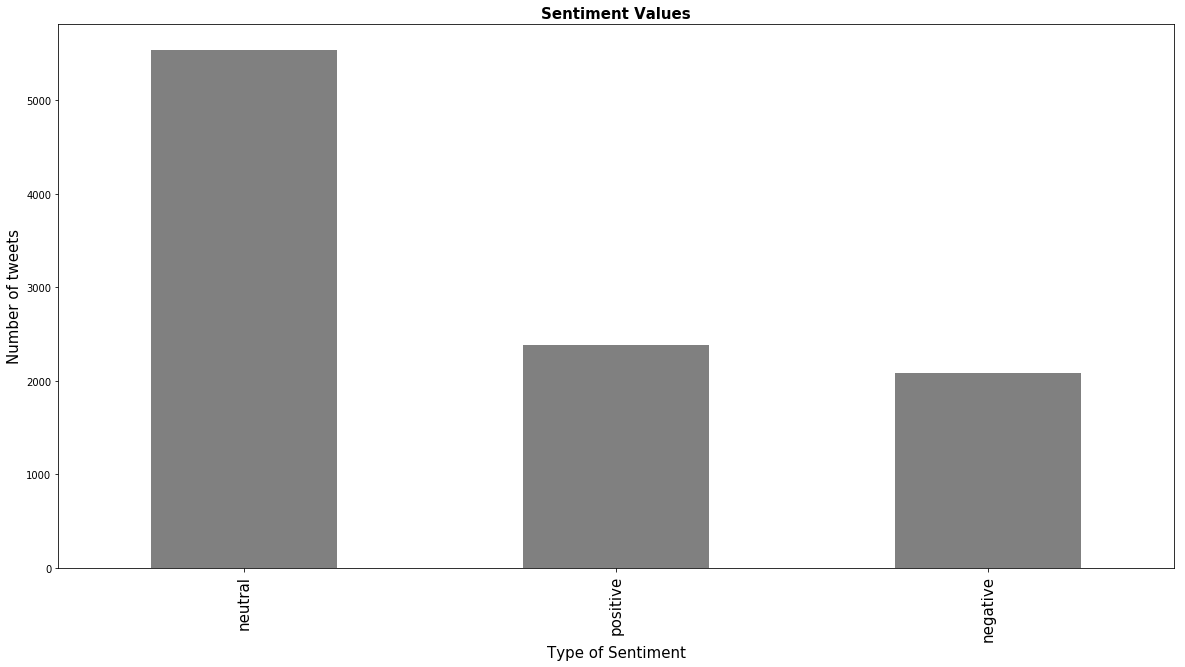

In [39]:
senti_types = tweets['sentiment_type'].value_counts()
ig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Type of Sentiment', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Sentiment Values', fontsize=15, fontweight='bold')
senti_types.plot(ax=ax, kind='bar', color='grey', figsize=(20,10))
print(senti_types)
plt.show()

In [84]:
df_positive = tweets
df_positive["sentiment_value"] = df_positive.sentiment_value.apply(lambda i:float(i))
positive_tweets = df_positive[df_positive["sentiment_value"]>0]
positive_tweets.head()

,text,lang,country,user,tweet_sentiment,sentiment_type,sentiment_value
1,"RT @Pawankhera: For the people of India, every...",en,NaN,"{'screen_name': 'amsabri7', 'profile_backgroun...","(positive, 0.032)",positive,0.032
4,RT @rangakidambee: I applaud @MALAVIKAAVINASH ...,en,NaN,"{'screen_name': 'mallesh_2004', 'profile_backg...","(positive, 0.25)",positive,0.250
6,RT @sanjivbhatt: If Lalu Prasad Yadav can be h...,en,NaN,"{'screen_name': 'malvikakapoor91', 'profile_ba...","(positive, 0.2)",positive,0.200
7,RT @jigneshmevani80: Narendra Modi is the best...,en,NaN,"{'screen_name': 'mave_rick', 'profile_backgrou...","(positive, 0.5)",positive,0.500
10,RT @rvaidya2000: Interesting and intriguing: i...,en,NaN,"{'screen_name': 'n_lalitha', 'profile_backgrou...","(positive, 0.4)",positive,0.400


INDIA                   758
Location Unavailable    737
DELHI                    64
MUMBAI                   55
भारत                     43
BANGALORE                34
HYDERABAD                24
USA                      19
PAKISTAN                 16
CHENNAI                  14
Name: location, dtype: int64


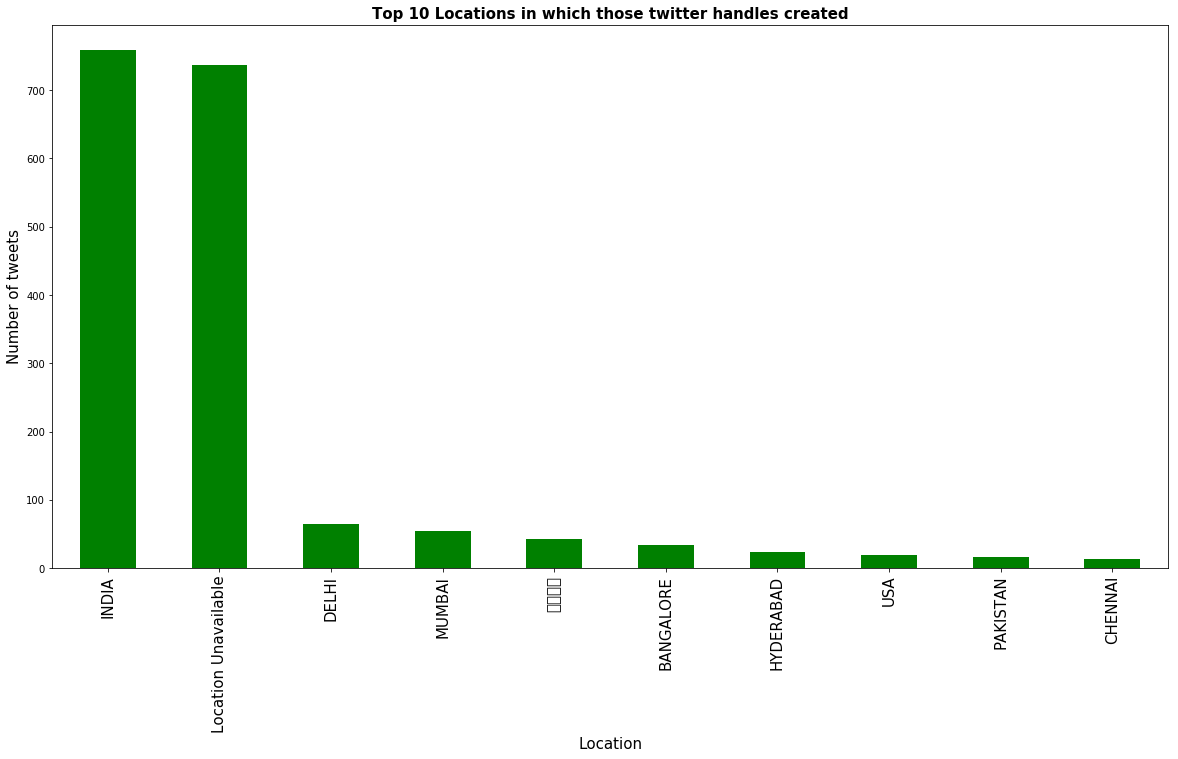

In [125]:
def handle_location_used(string):
    try:
        string = str(string)
        res = eval(string)["location"]
        return str(res.split()[-1]).upper()
    except:
        return "Location Unavailable"
    
handles_by_location = pd.DataFrame()
handles_by_location["location"] = positive_tweets.user.apply(handle_location_used)
t_b_l_5 = handles_by_location["location"].value_counts()[:10]
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Location', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 Locations in which those twitter handles created', fontsize=15, fontweight='bold')
t_b_l_5.plot(ax=ax, kind='bar', color='green', figsize=(20,10))
print(t_b_l_5[:10])
plt.show()

No Profile Image Available                                                    213
http://pbs.twimg.com/profile_images/951885952284164096/ZCyEqqOP_normal.jpg     22
http://pbs.twimg.com/profile_images/978402139918741504/ziLQEpW8_normal.jpg      8
http://pbs.twimg.com/profile_images/945625468161572864/94Lz9AJc_normal.jpg      8
http://pbs.twimg.com/profile_images/975221451908198402/qBI93HQf_normal.jpg      8
http://pbs.twimg.com/profile_images/955612299171045376/NAMW2CLZ_normal.jpg      7
http://pbs.twimg.com/profile_images/825039674473189376/NOYUjixR_normal.jpg      7
http://pbs.twimg.com/profile_images/594397994314649600/oqabiBzL_normal.jpg      7
http://pbs.twimg.com/profile_images/975233439120142336/uj_T9_fU_normal.jpg      6
http://pbs.twimg.com/profile_images/937256950324015106/q6CN0bOz_normal.jpg      6
Name: image_availability, dtype: int64


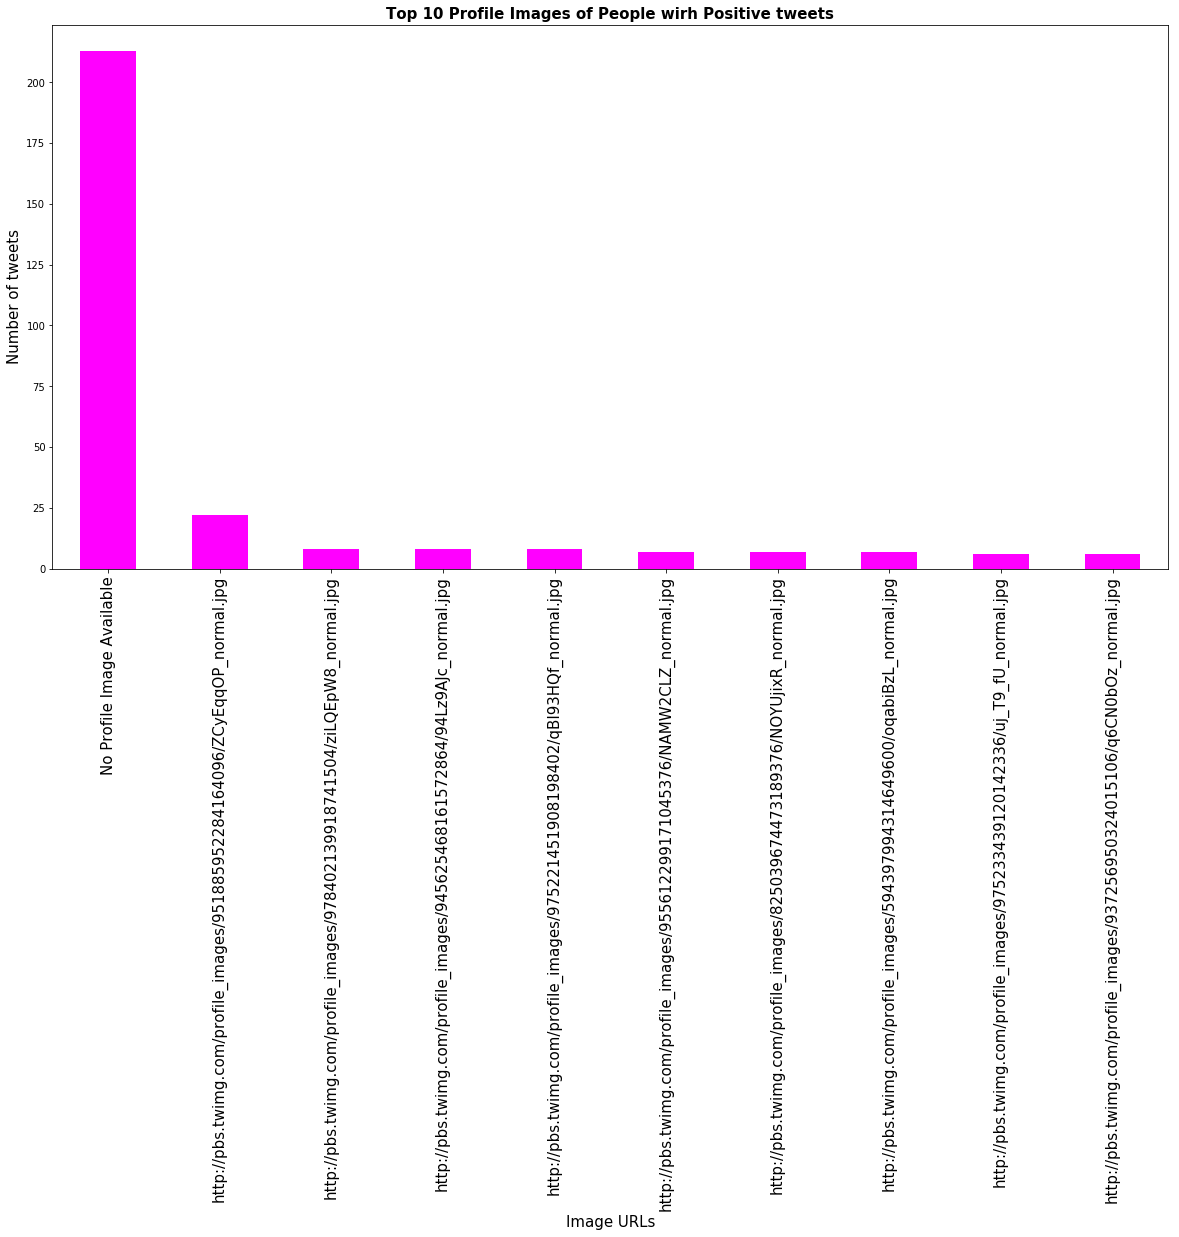

In [124]:
def handle_has_image(string):
    try:
        string=str(string)
        res = eval(string)["profile_image_url"]
        if "default_profile_normal.png" not in res:
            
            return res
        else:
            return "No Profile Image Available"
    except:
        return "No Profile Image Available"
    
handles_image_availability = pd.DataFrame()
handles_image_availability["image_availability"] = positive_tweets.user.apply(handle_has_image)
t_b_l_5 = handles_image_availability["image_availability"].value_counts()[:10]
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Image URLs', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 Profile Images of People wirh Positive tweets', fontsize=15, fontweight='bold')
t_b_l_5.plot(ax=ax, kind='bar', color='magenta', figsize=(20,10))
print(t_b_l_5[:10])
plt.show()

@PMNamo_            22
@ScamBusterIN        8
@yogees46            8
@tanmayj41128048     8
@prayag              7
@RaviCha60559085     7
@IYCJammuKashmir     7
@agrawalmayur23      6
@muraliks_11         6
@himkishore4         6
Name: screen_name, dtype: int64


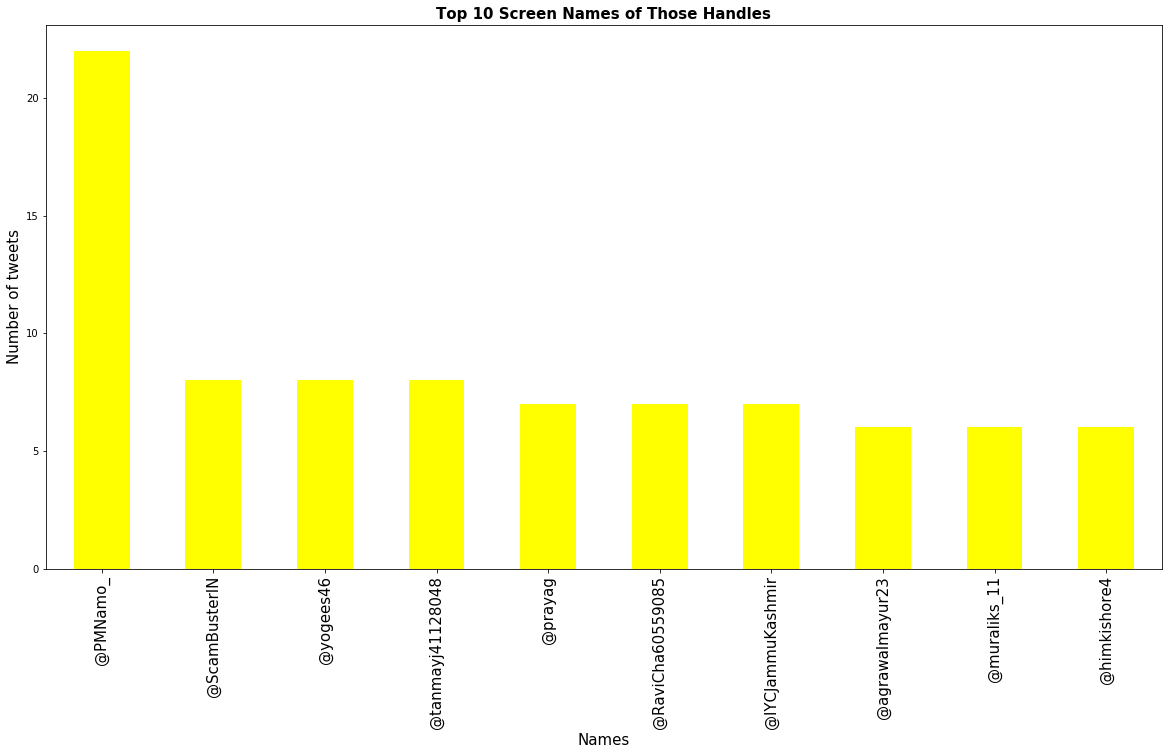

In [79]:
def handle_name(string):
    try:
        string = str(string)
        res = eval(string)["screen_name"]
        return "@"+res
    except:
        return None
    
handles_names = pd.DataFrame()
handles_names["screen_name"] = positive_tweets.user.apply(handle_name)
t_b_l_5 = handles_names["screen_name"].value_counts()[:10]
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Names', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 Screen Names of Those Handles', fontsize=15, fontweight='bold')
t_b_l_5.plot(ax=ax, kind='bar', color='yellow', figsize=(20,10))
print(t_b_l_5[:10])
plt.show()

2017    433
2010    277
2009    249
2016    225
2018    220
2014    216
2015    192
2013    187
2011    183
2012    166
Name: year, dtype: int64


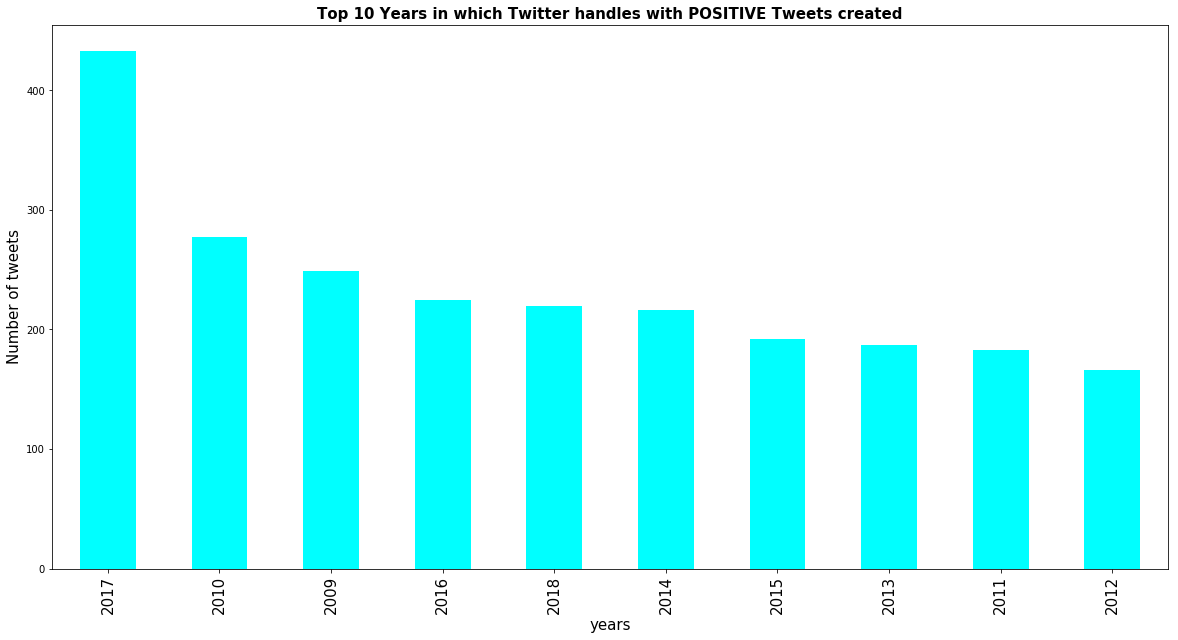

In [123]:
def handle_created_year(string):
    string = str(string)
    try:
        res = eval(string)["created_at"]
        return str(res.split()[-1])
    except:
        return "Year Unavailable"
    
handles_by_year = pd.DataFrame()
handles_by_year["year"] = positive_tweets.user.apply(handle_created_year)
t_b_l_5 = handles_by_year["year"].value_counts()[:10]
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('years', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 Years in which Twitter handles with POSITIVE Tweets created', fontsize=15, fontweight='bold')
t_b_l_5.plot(ax=ax, kind='bar', color='cyan', figsize=(20,10))
print(t_b_l_5[:10])
plt.show()

In [120]:
def find_positive_hash_words(string):
    pattern = r"#\w+"
    d = re.findall(pattern,string)
    if d == []:
        return None
    else:
        d = [i.lower() for i in d]
        return d
    
positive_hash_words = pd.DataFrame()
positive_hash_words["positive_words"] = positive_tweets.text.apply(find_positive_hash_words)
list_positive_words = positive_hash_words["positive_words"].tolist()
list_positive_words = [j for j in list_positive_words if j!= None]
list_positive_words = [k for l in list_positive_words for k in l]
positive_words_100 = pd.Series(list_positive_words).value_counts()[:100]
positive_words_100_list = positive_words_100.index.values
print("Top 10 Hash words in positive tweets - ", positive_words_100_list[:10])

Top 10 Hash words in positive tweets -  ['#bharatbandh' '#kamalkafool' '#happyjumladivas' '#modi'
 '#onetweet4kashmir' '#makeinindia' '#core1' '#petrol' '#dalitprotests'
 '#diesel']


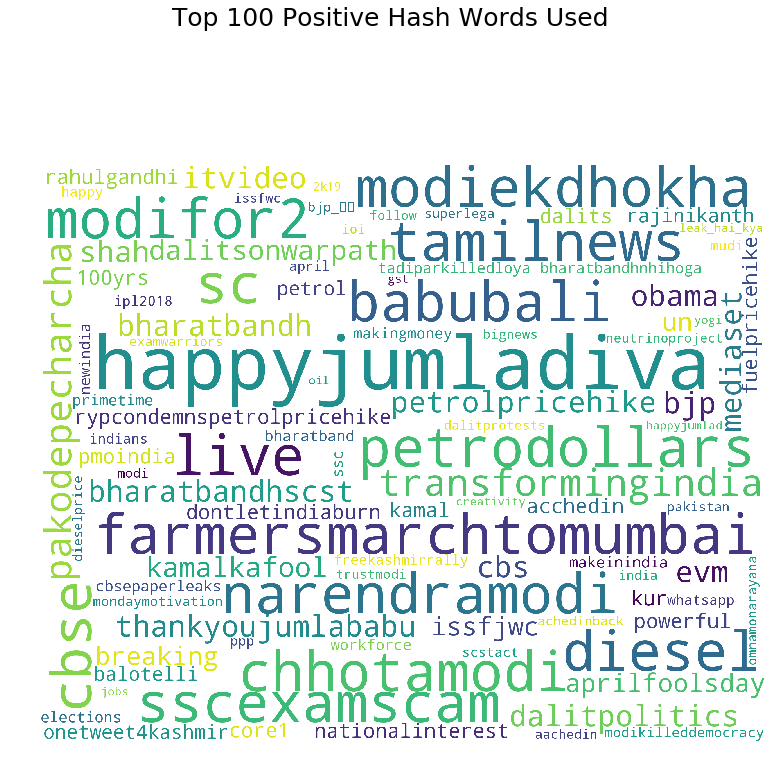

In [119]:
def wordcloud_figure(data, color = 'black'):
    cleaned_word = [word.replace(":","") for word in data]
    cleaned_word = [word.replace("?","") for word in data]
    cleaned_word = [word.replace(";","") for word in data]
    cleaned_word = [word.replace(",","") for word in data]
    #cleaned_word = [word.replace("#","") for word in data]
    new_data = " ".join(cleaned_word)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(new_data)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    if color=="white":
        plt.suptitle("Top 100 Positive Hash Words Used", fontsize=25)
    if color=="red":
        plt.suptitle("Top 100 Negative Hash Words Used", fontsize=25)
    if color not in ["red","white"]:
        plt.suptitle("Top 100 Neutral Hash Words Used", fontsize=25)
    plt.show()
    
wordcloud_figure(positive_words_100_list,'white')